## Investigating my Boston Marathon Data
This file contains the data analysis for the 2015 Boston Marathon


First I inserted the qualifying times to guide my research and data exploration qualifying times

Men 
* 18-34	3:05:00	3:03:58
* 35-39	3:10:00	3:08:58
* 40-44	3:15:00	3:13:58
* 45-49	3:25:00	3:23:58
* 50-54	3:30:00	3:28:58
* 55-59	3:40:00	3:38:58
* 60-64	3:55:00	3:53:58
* 65-69	4:10:00	4:08:58
* 70-74	4:25:00	4:23:58
* 75-79	4:40:00	4:38:58
* 80+	    4:55:00	4:53:58

Women
* 18-34	3:35:00	3:33:58
* 35-39	3:40:00	3:38:58
* 40-44	3:45:00	3:43:58
* 45-49	3:55:00	3:53:58
* 50-54	4:00:00	3:58:58
* 55-59	4:10:00	4:08:58
* 60-64	4:25:00	4:23:58
* 65-69	4:40:00	4:38:58
* 70-74	4:55:00	4:53:58
* 75-79	5:10:00	5:08:58
* 80+	    5:25:00	5:23:58


These are some of the questions that I looked at with the analysis

* How many participants are there per age group?
* What is the age group with the most participants?
* What is the mean finish time for each age group separated by gender?
* What is the mean finish time difference between males and females in the same age division?
* What percentage of participants keep with their qualifying time on race day?


In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt

In [57]:
Y2015=pd.read_csv("../data/marathon_results_2015.csv")
Y2016=pd.read_csv("../data/marathon_results_2016.csv")
Y2017=pd.read_csv("../data/marathon_results_2017.csv")

I imported the data for the three years in case I needed it for any analysis 

In [61]:
Y2015['year']=2015
Y2016['year']=2016
Y2017['year']=2017

In [62]:
df = pd.concat([Y2015, Y2016, Y2017])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [64]:
df.to_csv('../data/all_data.csv', index=False)

I created a file containing the data for the three years which I used in another folder for the majority of my analysis 

* We have 26598 participants and 25 columns 

Regardless in this file I am carrying out specific analysis of the 2015 marathon

In [7]:
Y2015.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

Looking at the column names

In [8]:
Y2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


* The most important columns in our data are: age, pace, official time, gender, and time at each 5k mark

In [9]:
Y2015['Age'].value_counts()


45    1035
46    1033
40     904
47     854
50     853
41     842
43     835
42     820
35     754
37     752
48     737
51     735
36     733
38     714
44     692
33     663
49     658
39     656
52     650
29     646
27     611
31     606
30     602
32     597
28     595
55     594
34     592
26     574
53     559
25     525
      ... 
58     347
23     308
22     265
61     261
59     237
62     207
21     182
63     174
65     167
66     131
64     117
67     101
20      97
68      60
70      54
19      53
71      39
69      35
72      20
18      20
73      17
74      13
76      13
75      11
77       8
80       5
82       4
78       4
81       2
79       2
Name: Age, Length: 65, dtype: int64

* The age  with the most amount of participants is 45 years of age. 
* The age  with the least amount of participants are 81 and 79

In [10]:
Y2015['Pace'].describe()

count       26598
unique        555
top       0:07:58
freq          173
Name: Pace, dtype: object

In [11]:
Y2015.groupby('M/F')['Age'].value_counts()

M/F  Age
F    40     454
     45     444
     41     436
     46     430
     37     395
     42     391
     36     390
     35     389
     43     375
     27     372
     38     349
     47     349
     29     348
     28     344
     30     343
     50     340
     25     337
     39     337
     33     336
     26     335
     44     328
     48     315
     31     306
     32     303
     49     294
     34     287
     24     277
     51     275
     52     244
     23     200
           ... 
M    25     188
     59     177
     62     171
     24     146
     65     136
     63     131
     23     108
     66     102
     22     100
     64      89
     67      84
     21      82
     68      51
     70      45
     20      42
     71      33
     69      30
     19      27
     72      19
     73      14
     74      12
     76      12
     18      10
     75      10
     77       8
     80       5
     78       4
     82       3
     79       2
     81       2
Name: Age, Leng

I am grouping the data by gender and age to see how many participants we have separated by gender. 
For females  40 years has the most amount of participants.
For males 25 years has the most amount of participants.

In [12]:
age_cuts=[18,35,40,45,50,55,60,65,70,75,80,100]
age_bands=['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79','80 and over']

I am creating the age band divisions used for the qualifying times

In [13]:
len(age_cuts)

12

We have 12 age bands

In [14]:
Y2015['Age_band']=pd.cut(Y2015['Age'], bins=age_cuts, labels=age_bands, 
       right=False)

In [15]:
Y2015.groupby(['M/F', 'Age_band']).size()

M/F  Age_band   
F    18-34          4144
     35-39          1860
     40-44          1984
     45-49          1832
     50-54          1206
     55-59           607
     60-64           270
     65-69            91
     70-74            20
     75-79             2
     80 and over       1
M    18-34          3215
     35-39          1749
     40-44          2109
     45-49          2485
     50-54          2055
     55-59          1498
     60-64           898
     65-69           403
     70-74           123
     75-79            36
     80 and over      10
dtype: int64

Now I have separated participants by age group and gender

Next I created a function to turn the time in hours minutes seconds into minutes

In [16]:
def time_str_to_mins(tstr):
    '''
    convert a string with a race time of the form
    H:M:S, e.g. 3:43:20 to the number of minute
    H*60 + M + S/60
    '''
    
    H,M,S = tstr.split(':')
    
    total_minutes = int(H)*60 + int(M) + int(S)/60
    
    return total_minutes

In [17]:
t="3:24:12"
t.split(':')

['3', '24', '12']

In [18]:
time_str_to_mins(t)

204.2

In [19]:
Y2015['Offical_Time_Mins']=Y2015['Official Time'].map(time_str_to_mins)

In [20]:
Y2015['Offical_Time_Mins'].mean()

226.42651013860663

In [21]:
Y2015.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack()

M/F,F,M
Age_band,,
18-34,233.244249,201.206407
35-39,231.146783,204.367877
40-44,235.972555,209.737364
45-49,241.249745,214.663588
50-54,246.176976,222.305410
55-59,256.011340,231.590465
60-64,268.482222,245.883185
65-69,287.868498,262.168156
70-74,292.123333,278.194173


These are the mean official times by gender and age band in minutes

In [22]:
Y2015.groupby(['Age_band', 'M/F']).size().unstack()

M/F,F,M
Age_band,,
18-34,4144,3215
35-39,1860,1749
40-44,1984,2109
45-49,1832,2485
50-54,1206,2055
55-59,607,1498
60-64,270,898
65-69,91,403
70-74,20,123


This is the amount of participants by gender and age band in this years race

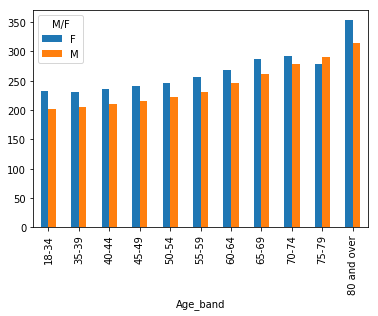

In [23]:
Y2015.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().plot(kind='bar')

The graph illustrates the mean finish time by age group and gender

In [24]:
Y2015.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().diff(-1, axis=1)

M/F,F,M
Age_band,,
18-34,32.037841,NaN
35-39,26.778906,NaN
40-44,26.235192,NaN
45-49,26.586157,NaN
50-54,23.871567,NaN
55-59,24.420875,NaN
60-64,22.599037,NaN
65-69,25.700343,NaN
70-74,13.929160,NaN


The table shows the mean finish time difference between males and females by age group. 
We can see that it changes by age band significantly

In [25]:

fmean_34=233.244249
mmean_34=201.206407
qfemale_34=210.000
qmale_34=180.00


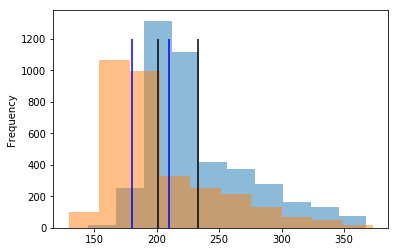

In [26]:
dist=Y2015[Y2015['Age_band']=='18-34'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_34, 0, 1200)
plt.vlines(mmean_34, 0, 1200)
plt.vlines(qfemale_34, 0, 1200, color="blue")
plt.vlines(qmale_34, 0, 1200, color="blue")

I am plotting the mean finish times for both genders in the 18-34 category and comparing it to the qualifying time.
I then also carried out the same analysis for other age bands.

In [5]:
fmean_39=231.146783
mmean_39=204.367877
qfemale_39=215.000
qmale_39=185.00

In [6]:
dist=Y2015[Y2015['Age_band']=='35-39'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_39, 0, 1200)
plt.vlines(mmean_39, 0, 1200)
plt.vlines(qfemale_39, 0, 1200, color="blue")
plt.vlines(qmale_39, 0, 1200, color="blue")


NameError: name 'Y2015' is not defined

In [29]:
fmean_44=235.972555
mmean_44=209.737364
qfemale_44=220.000
qmale_44=190.00

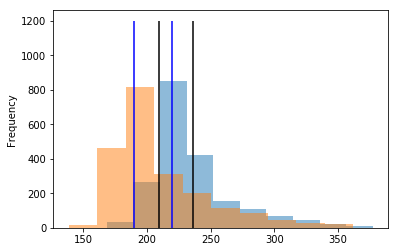

In [30]:
dist=Y2015[Y2015['Age_band']=='40-44'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_44, 0, 1200)
plt.vlines(mmean_44, 0, 1200)
plt.vlines(qfemale_44, 0, 1200, color="blue")
plt.vlines(qmale_44, 0, 1200, color="blue")

In [31]:
fmean_49=241.249745
mmean_49=214.663588
qfemale_49=225.000
qmale_49=195.00

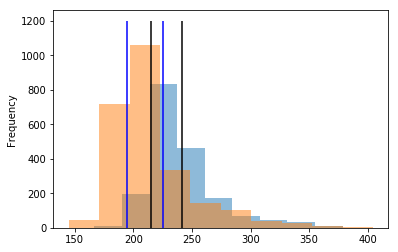

In [32]:
dist=Y2015[Y2015['Age_band']=='45-49'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_49, 0, 1200)
plt.vlines(mmean_49, 0, 1200)
plt.vlines(qfemale_49, 0, 1200, color="blue")
plt.vlines(qmale_49, 0, 1200, color="blue")

In [33]:
fmean_54=246.176976
mmean_54=222.305410
qfemale_54=230.000
qmale_54=200.00

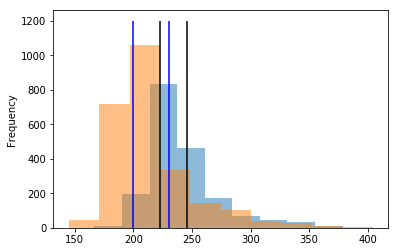

In [34]:
dist=Y2015[Y2015['Age_band']=='45-49'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_54, 0, 1200)
plt.vlines(mmean_54, 0, 1200)
plt.vlines(qfemale_54, 0, 1200, color="blue")
plt.vlines(qmale_54, 0, 1200, color="blue")

In [35]:
fmean_59=256.011340
mmean_59=231.590465
qfemale_59=235.000
qmale_59=205.00

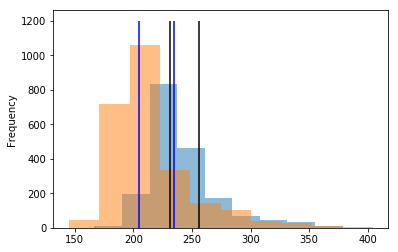

In [36]:
dist=Y2015[Y2015['Age_band']=='45-49'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_59, 0, 1200)
plt.vlines(mmean_59, 0, 1200)
plt.vlines(qfemale_59, 0, 1200, color="blue")
plt.vlines(qmale_59, 0, 1200, color="blue")

In [37]:
fmean_64=268.482222
mmean_64=245.883185
qfemale_64=240.0
qmale_64=210.00

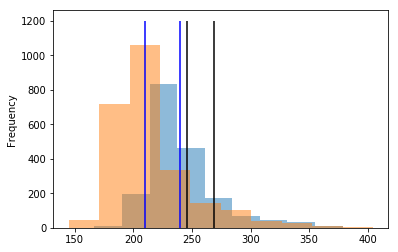

In [38]:
dist=Y2015[Y2015['Age_band']=='45-49'].groupby('M/F')['Offical_Time_Mins'].plot(kind='hist', alpha=0.5)
plt.vlines(fmean_64, 0, 1200)
plt.vlines(mmean_64, 0, 1200)
plt.vlines(qfemale_64, 0, 1200, color="blue")
plt.vlines(qmale_64, 0, 1200, color="blue")

In [39]:
Y2015['Offical_Time_Mins']

0        129.283333
1        129.800000
2        130.366667
3        130.783333
4        130.816667
5        130.866667
6        131.333333
7        132.700000
8        133.583333
9        133.866667
10       133.866667
11       134.283333
12       136.416667
13       138.033333
14       138.733333
15       139.200000
16       139.283333
17       140.066667
18       140.416667
19       140.583333
20       140.700000
21       141.166667
22       141.266667
23       141.966667
24       142.083333
25       142.500000
26       143.350000
27       144.616667
28       144.733333
29       144.816667
            ...    
26568    367.833333
26569    367.833333
26570    367.883333
26571    367.933333
26572    368.033333
26573    368.083333
26574    369.083333
26575    370.116667
26576    372.000000
26577    372.183333
26578    372.466667
26579    373.400000
26580    374.333333
26581    377.383333
26582    384.500000
26583    386.483333
26584    386.483333
26585    389.883333
26586    397.066667


In [42]:
female = Y2015['M/F']=='F'
age18_34 = Y2015['Age_band']=='18-34'
on_time_f_34=sum(Y2015[female & age18_34]['Offical_Time_Mins']<=210)

In [43]:
on_time_f_34


1448

I am now looking at the amount of females in the 18-34 age group who finished within their qualifying time

In [41]:
Y2015[female & age18_34]['Offical_Time_Mins'].shape

(4144,)

34.94% of women in this age group ran within their qualifying time

In [ ]:
I the looked at I he amount of females in the 35-39 age group who finished within their qualifying time

In [50]:
female = Y2015['M/F']=='F'
age35_39 = Y2015['Age_band']=='35-39'
on_time_f_39=sum(Y2015[female & age35_39]['Offical_Time_Mins']<=215)

In [51]:
on_time_f_39

667

In [49]:
Y2015[female & age35_39]['Offical_Time_Mins'].shape

(1860,)

In [56]:
1860-667

1193

35.86% of women in this age group ran within their qualifying time

I stopped carrying out further analysis in this notebook because I realized it would be better to do my analysis with the grouped data from all three years of the race. That way I could have more data and thus all my averages with have a chance to be more accurate and less prone to high standard deviations.